In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Sale_Report.csv')
df.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [11]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [12]:
df = df.drop(columns=['order_details_id','order_id'])
df.columns

Index(['pizza_id', 'quantity', 'order_date', 'order_time', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name'],
      dtype='object')

In [22]:
df.isnull().sum()

pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [23]:
# Ensure correct data types
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time'] = pd.to_datetime(df['order_time']).dt.time

C:\Users\U\AppData\Local\Temp\ipykernel_6692\3880736787.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time']).dt.time


In [24]:
category_sales = df.groupby('pizza_category')['total_price'].sum().reset_index()

In [25]:
size_sales = df.groupby('pizza_size')['total_price'].sum().reset_index()

In [26]:
df['hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
time_sales = df.groupby('hour')['total_price'].sum().reset_index()

C:\Users\U\AppData\Local\Temp\ipykernel_6692\2096281037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='pizza_category', y='total_price', palette='viridis')


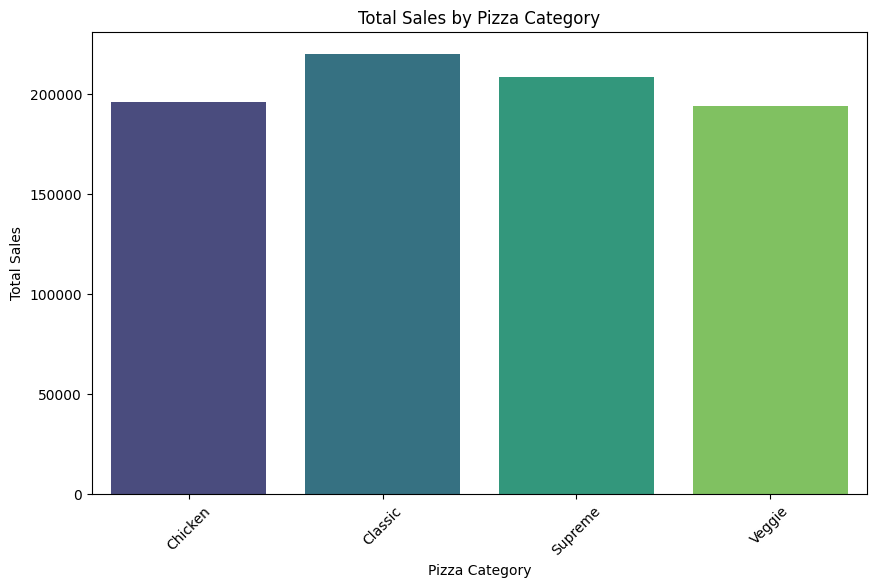

In [27]:
# Pizza Sales by category
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='pizza_category', y='total_price', palette='viridis')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


C:\Users\U\AppData\Local\Temp\ipykernel_6692\2948626582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_sales, x='pizza_size', y='total_price', palette='coolwarm')


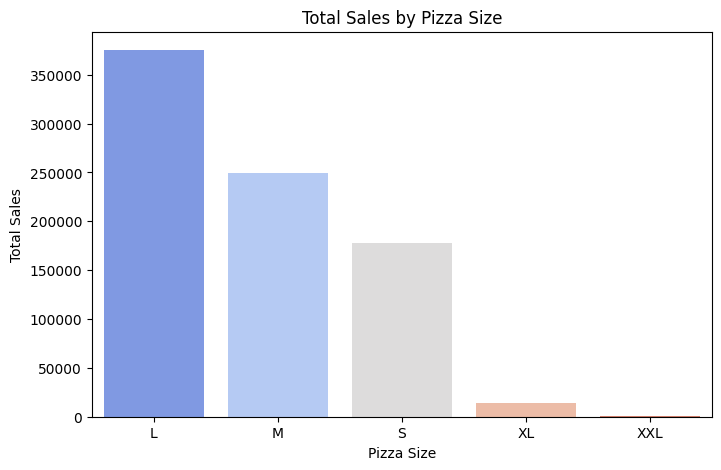

In [28]:
# Pizza sales by size
plt.figure(figsize=(8, 5))
sns.barplot(data=size_sales, x='pizza_size', y='total_price', palette='coolwarm')
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.show()


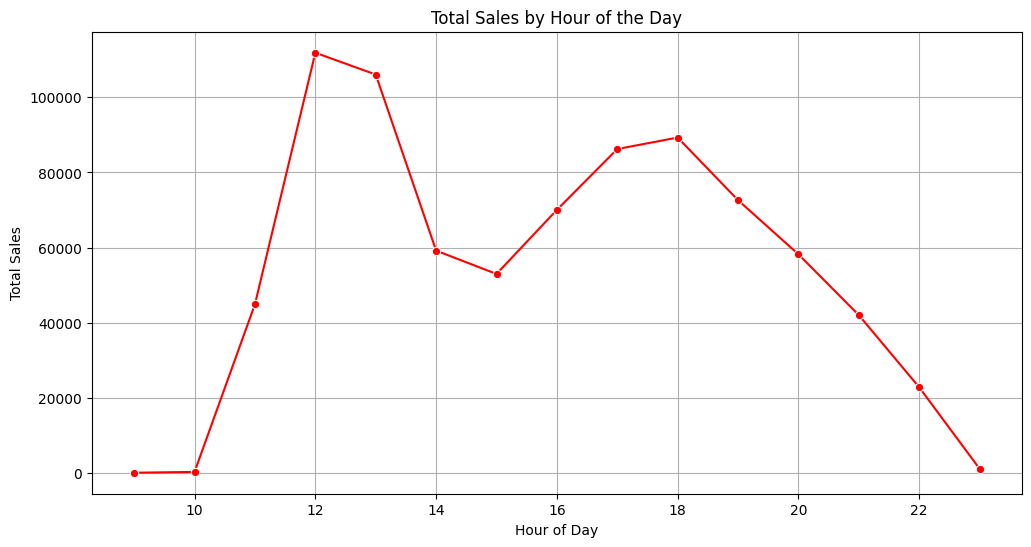

In [31]:
# Pizza Sales by Hours
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_sales, x='hour', y='total_price', marker='o', color='red')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

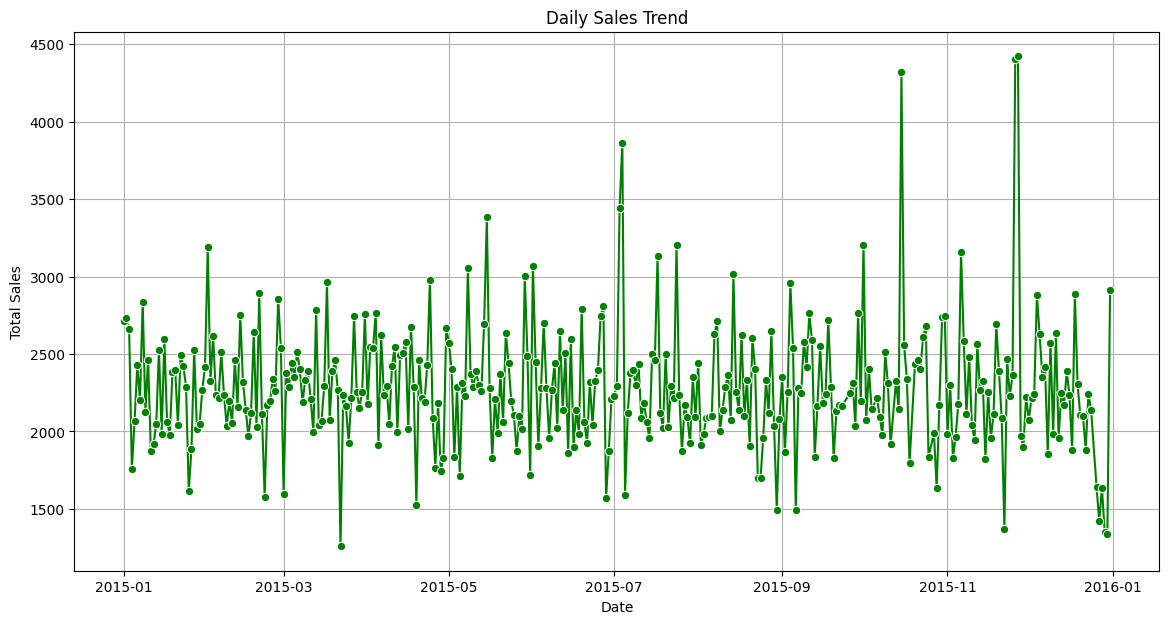

In [ ]:
# Daily Sales Trend 
date_sales = df.groupby('order_date')['total_price'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=date_sales, x='order_date', y='total_price', marker='o', color='green')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


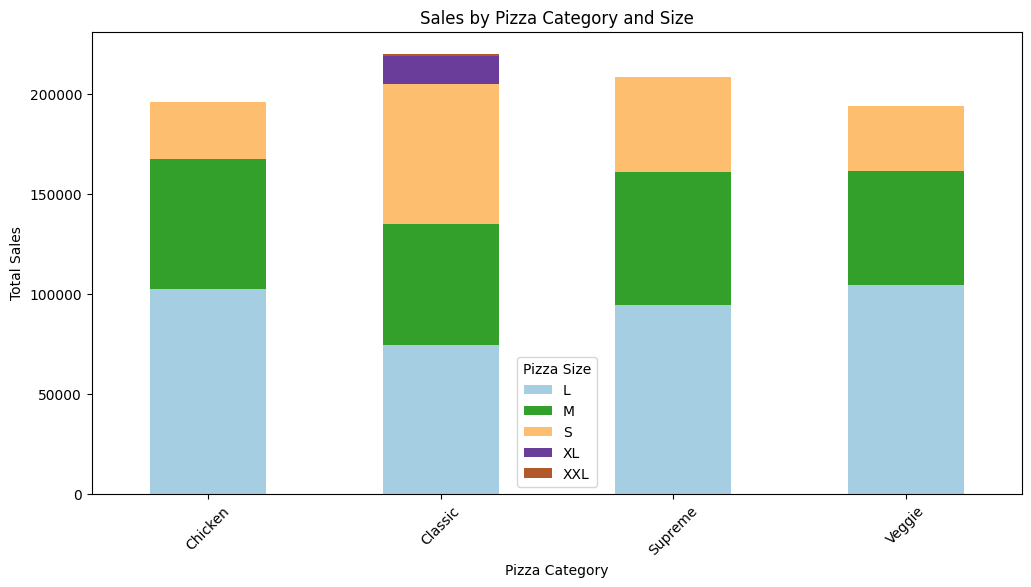

In [34]:
# Sales by Category and Size
category_size_sales = df.groupby(['pizza_category', 'pizza_size'])['total_price'].sum().unstack()

category_size_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Sales by Pizza Category and Size')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.legend(title='Pizza Size')
plt.xticks(rotation=45)
plt.show()
